<a href="https://colab.research.google.com/github/vyshnavi2001/NNDL/blob/main/assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

data=np.array([[0.2,3.4],[0.4,3.8],[0.6,4.2],[0.8,4.6]])
data

array([[0.2, 3.4],
       [0.4, 3.8],
       [0.6, 4.2],
       [0.8, 4.6]])

In [3]:
x=[]
y=[]
for i in range(0,len(data)):
  x.append(data[i][0])
for i in range(0,len(data)):
  y.append(data[i][1])
x=np.array(x)
y=np.array(y)

In [4]:
bs=2
nb=np.ceil(len(data)/bs)
print("no of batches : "+str(nb))

no of batches : 2.0


In [5]:
# Shuffle Data
samples=np.arange(len(data))
random.shuffle(samples)
samples

array([3, 2, 1, 0])

In [6]:
for i in samples:
  print(x[i],y[i])

0.8 4.6
0.6 4.2
0.4 3.8
0.2 3.4


In [7]:
m=1
c=-1
n=0.1
iter=1
epochs=100

In [8]:
while (iter<=epochs):
  batch = 1
  while (batch<=nb):
    der_m=0
    der_c=0
    error=0
    for i in range(0,bs):
      der_m = der_m + (y[samples[i]] - (m*x[samples[i]]) - c)*x[samples[i]]
      der_c = der_c + (y[samples[i]] - (m*x[samples[i]]) - c)
    der_m = (-1/bs)*der_m
    der_c = (-1/bs)*der_c

    m_change = (-1)*n*der_m
    c_change = (-1)*n*der_c

    m = m + m_change
    c = c + c_change

    batch = batch + 1
  iter = iter + 1
print('Optimal values of m,c are : \n'+str(m),str(c))

Optimal values of m,c are : 
3.0629283566848993 2.2509339828194217


In [9]:
predict = []
for i in range(0,len(data)):
  predict.append(m*x[i]+c)
predict


[2.8635196541564016, 3.4761053254933816, 4.088690996830361, 4.701276668167342]

In [10]:
#mse
mse=0
for i in range(0,len(data)):
  mse = mse + (y[i]-(predict[i]))**2
mse =(1/len(data))*mse
mse

0.1038413948379779

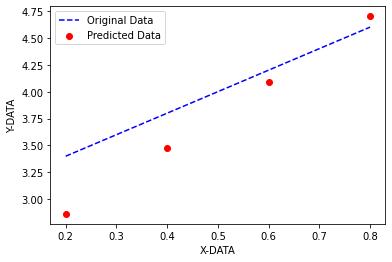

In [11]:
plt.plot(x,y,'--',color='b',label='Original Data')
plt.scatter(x,predict,color='r',label='Predicted Data')
plt.xlabel('X-DATA')
plt.ylabel('Y-DATA')
plt.legend()
plt.show()